In [2]:
import numpy
import matplotlib.pyplot as plt

In [3]:
def derivada(y:float,x:float)->float:
    return x+(2*y)
derivada(1,1)

3

In [4]:
def rungekutta(h:float,x:numpy.array)->numpy.array:
    y=numpy.zeros(x.size)
    y[0]=0
    for i in range(0,x.size-1):
        k1=derivada(y[i],x[i])
        k2=derivada(y[i]+(k1*h/2),x[i]+(h/2))
        k3=derivada(y[i]+(k2*h/2),x[i]+(h/2))
        k4=derivada(y[i]+(k3*h),x[i]+h)
        y[i+1]=y[i]+((k1+(2*k2)+(2*k3)+k4)*h/6)
    return y

In [5]:
def adams4(t,h):
    t4=t[:5]
    y=numpy.zeros_like(t)
    prima=numpy.zeros_like(t)
    y4=rungekutta(h,t4)
    for i in range(0,5):
        y[i]=y4[i]
        prima[i]=derivada(y4[i],t[i])
    for i in range(0,t.size-5):
        #bashford
        y[i+5]=y[i+4]+(h*((1901*prima[i+4])-(2774*prima[i+3])+(2616*prima[i+2])-(1274*prima[i+1])+(251*prima[i]))/720)
        prima[i+5]=derivada(y[i+5],t[i+5])
    for i in range(0,t.size-5):
        #moulton
        y[i+5]=y[i+5]+(h*((475*prima[i+5])+(1427*prima[i+4])-(798*prima[i+3])+(482*prima[i+2])-(173*prima[i+1])+(27*prima[i]))/1440)
        prima[i+5]=derivada(y[i+5],t[i+5])
    return y

In [6]:
def analitica(t):
    return -(t/2)-(1-numpy.exp(2*t))/4

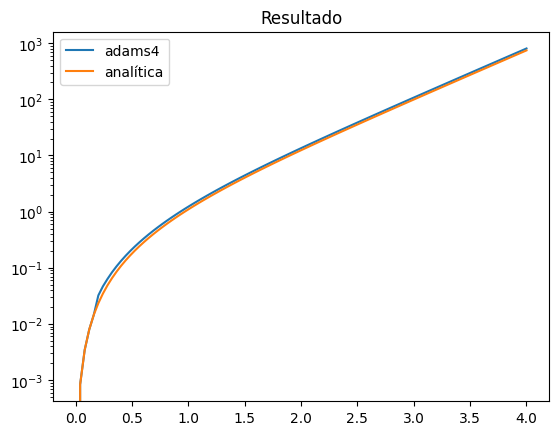

In [8]:
t=numpy.linspace(0.,4.,100)
yr=analitica(t)
y4=adams4(t,t[1]-t[0])
plt.plot(t,y4,label="adams4")
plt.plot(t,yr,label="analítica")
plt.yscale('log')
plt.title("Resultado")
plt.legend()

Text(0.5, 1.0, 'Diferencia')

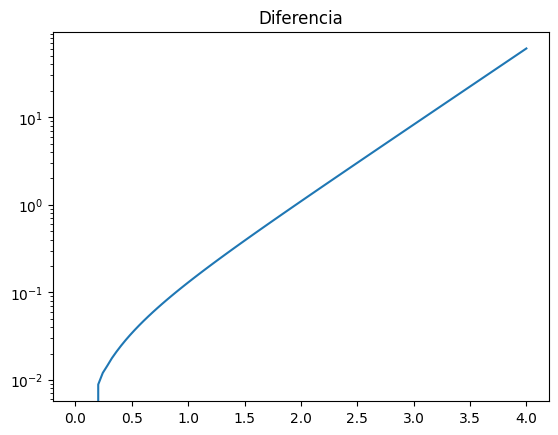

In [15]:
t=numpy.linspace(0.,4.,100)
yr=analitica(t)
y4=adams4(t,t[1]-t[0])
plt.plot(t,y4-yr)
plt.yscale('log')
plt.title("Diferencia")